In [8]:
import os
import subprocess
import random
import re
import pandas as pd
import matplotlib.pyplot as plt

Путь до файлов

In [9]:

filename_lupanov=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project/result/")
filename_cascade=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project/mks/src/build/result")
filename_sdnf=os.path.realpath("/Users/michaelbrown/Documents/GitHub/aig_project_copy/result")

input_filename = "/Users/michaelbrown/Documents/GitHub/aig_project/src/input.txt"

translator = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/aig2verilog1.py"

output_lupanov = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_lupanov.txt"
circuit_lupanov = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_lupanov.v"
output_cascade = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_cascade.txt"
circuit_cascade = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v"
output_sdnf  = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/output_sdnf.txt"
circuit_sdnf = "/Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_sdnf.v"


Генерация функции

In [10]:
from itertools import groupby

def check_output(sequence):
    if isinstance(sequence, (int, float)):
        sequence = str(sequence)

    groups = [list(g) for k, g in groupby(sequence)]

    k_check = len(groups[0])
    for i in range(len(groups)):
        if len(groups[i]) != k_check:
            return False
        if int(groups[i][0]) != (i + int(groups[0][0])) % 2:
            return False

    return True


In [11]:
def func_generation(n):
    output = [random.randint(0, 1) for _ in range(2**n)]
    output = ''.join(map(str,output))
    if(check_output(output)):
        func_generation(n)  
    else:
        with open(input_filename, "w") as file:
            file.write(output)
            file.close

In [12]:
def bf_write(a):
    output = a
    output = ''.join(map(str,output))

    with open(input_filename, "w") as file:
        file.write(output)
        file.close

In [8]:
import itertools
def generate_specific_function(n_vars):
    """
    This function is designed to generate a specific output pattern for a given number of variables.
    For illustrative purposes, this example assumes a hypothetical function that maps variable configurations
    to outputs in a specific way defined by the user or a certain logical pattern.
    """
    # Generate all possible combinations of binary values for n variables
    combinations = list(itertools.product([0, 1], repeat=n_vars))

    # Define a dummy function for demonstration
    # Replace this with the actual logic of the function you are trying to model
    def dummy_function(*args):
        # Example logic; replace with the real function's logic
        return sum(args) % 2  # Just as an example, change based on actual function logic

    # Generate output for each combination of variables
    outputs = []
    for combo in combinations:
        result = dummy_function(*combo)  # Apply the dummy function
        outputs.append(result)

    # Convert outputs to a single string for display
    output_str = ''.join(map(str, outputs))
    return output_str

# Generate and print the output for a function with 4 variables
output_example = generate_specific_function(4)
output_example


'0110100110010110'

In [9]:
def essential_function(*args):
    # Проверяем, не пуст ли список аргументов
    if not args:
        raise ValueError("Функция требует хотя бы один аргумент")
    
    sum_args = sum(args)
    product_args = 1
    for arg in args:
        product_args *= arg
    
    # Возвращаем сумму всех аргументов плюс их произведение
    return sum_args + product_args

# Пример использования функции
result = essential_function(2, 3, 4)
print(result)


33


Перевод форматов

In [20]:
result = subprocess.run([filename_lupanov], cwd="/Users/michaelbrown/Documents/GitHub/aig_project/", stdout=subprocess.PIPE, stderr=subprocess.STDOUT)



In [15]:
result

CompletedProcess(args=['/Users/michaelbrown/Documents/GitHub/aig_project/result'], returncode=0, stdout=b'17 20 0 1 0 1 0 1 1 1 1 2 0 2 0 2 1 2 1 6 0 3 0 7 0 3 0 6 0 3 1 7 0 3 1 5 0 9 0 5 0 10 0 4 1 5 1 14 1 14 1 15 0 11 0 12 1 13 1 17 1 17 1 18 1 16 1 19 1 19 1 \n')

In [13]:
def synthesis_toabc(n, type):
    
    if type == 0: # lupanov
        result = subprocess.run([filename_lupanov], cwd="/Users/michaelbrown/Documents/GitHub/aig_project/", stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        result.stdout = str(n) + ' ' + str(result.stdout)[2:-3]
        output_text = result.stdout
        output_file = output_lupanov
        circuit_file = circuit_lupanov
    elif type == 1:  # cascade
        result = subprocess.run([filename_cascade], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        result.stdout = str(n) + ' ' + str(result.stdout)[2:-3]
        output_text = result.stdout
        output_file = output_cascade
        circuit_file = circuit_cascade
    elif type == 2:  # sdnf
        result = subprocess.run([filename_sdnf], shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        result.stdout = str(n) + ' ' + str(result.stdout)[2:-3]
        output_text = result.stdout
        output_file = output_sdnf
        circuit_file = circuit_sdnf
    else:
        raise ValueError("Unsupported type")

    # Write to the output file
    with open(output_file, "w") as file:
        file.write(output_text)

    # Run the translation script
    cmd = ["python3", translator, "example", output_file, circuit_file]
    subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

In [22]:
synthesis_toabc(3, 0)

1
1
11
111
1111
11


Создание базы функций

In [123]:

def append_to_dataframe(s, df=None):
    # If no DataFrame is provided, create a new one
    if df is None:
        df = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    
    # Decoding to string if it's in bytes
    if isinstance(s, bytes):
        s = s.decode('utf-8')

    # Regular expression to match the desired pattern
    pattern = re.compile(r'i/o =\s*(\d+)/\s*(\d+)\s*lat =\s*(\d+)(?:\s+and =\s*(\d+))?(?:\s+lev =\s*(\d+))?')
    matches = pattern.findall(s)

    matches = pattern.findall(s)  # Find all matches

    # Extract data from matches
    data = []
    for i, (io_in, io_out, lat, nd_and, lev) in enumerate(matches):
        if i == 0:  # For the 'before' stats
            row = {'i/o in': io_in, 'i/o out': io_out, 'lat_before': lat, 'nd_before': nd_and, 'lev_before': lev}
        else: # For the 'after' stats
            row.update({'lat_after': lat, 'and_after': nd_and, 'lev_after': lev})
    
    data.append(row)
    new_df = pd.DataFrame(data)  # Convert the data list to a DataFrame

    return pd.concat([df,new_df], ignore_index=True)

In [124]:
def append_to_dataframe_prev(s, df=None):
    # If no DataFrame is provided, create a new one
    if df is None:
        df = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    
    # Decoding to string if it's in bytes
    if isinstance(s, bytes):
        s = s.decode('utf-8')
   

    # Regular expression to match the desired pattern
    pattern = re.compile(r'i/o =\s+(\d+)/\s+(\d+)\s+lat =\s+(\d+)\s+(nd|and) =\s+(\d+)\s+(?:edge =\s+\d+\s+aig\s+=\s+\d+\s+)?lev =\s+(\d+)')
    
    matches = pattern.findall(s)  # Find all matches
    print(matches)


    # Extract data from matches
    data = []
    for i, (io_in, io_out, lat, nd_and, nd_and_edge_val, lev) in enumerate(matches):
        if i == 0:  # For the 'before' stats
            row = {'i/o in': io_in, 'i/o out': io_out, 'lat_before': lat, 'nd_before': nd_and_edge_val, 'lev_before': lev}
        else:  # For the 'after' stats
            row.update({'lat_after': lat, 'and_after': nd_and_edge_val, 'lev_after': lev})

    data.append(row)
    new_df = pd.DataFrame(data)  # Convert the data list to a DataFrame

    return pd.concat([df,new_df], ignore_index=True)


In [125]:
def depth_analysis(amount, type):
    analysis_iter = []
    if type == 0:  # lupanov
        return str(subprocess.run([f"./abc -c 'read {circuit_lupanov};strash; print_stats; resyn2; {'resyn2; ' * amount}print_stats'"], shell=True, capture_output=True).stdout)
    elif type == 1:  # cascade
        return str(subprocess.run([f"./abc -c 'read {circuit_cascade};strash; print_stats; resyn2; {'resyn2; ' * amount}print_stats'"], shell=True, capture_output=True).stdout)
    elif type == 2:  # sdnf
        return str(subprocess.run([f"./abc -c 'read {circuit_sdnf};strash; print_stats; resyn2; {'resyn2; ' * amount}print_stats'"], shell=True, capture_output=True).stdout)
    else:
        return 0

In [145]:

def analysis(type):
    amount = 0
    i = 0
    df_curr = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_prev = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_curr = append_to_dataframe(depth_analysis(amount + 1, type), df_curr)
    df_prev = append_to_dataframe(depth_analysis(amount, type), df_prev)
    amount = 1
    i = 0
    while(int(df_curr.iloc[i, 6]) != int(df_prev.iloc[i, 6])):
        df_curr = append_to_dataframe(depth_analysis(amount + 1, type), df_curr)
        df_prev = append_to_dataframe(depth_analysis(amount, type), df_prev)
        amount += 1
        i += 1

    return df_curr.iloc[i]


In [127]:
def dataframe_generation(n, k):
    df_lupanov = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_cascade = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_sdnf = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    for i in range (k):
        func_generation(n)
        for l in range (3):
            synthesis_toabc(n, l)
            
            if l == 0:
                df_lupanov = df_lupanov._append(analysis(l), ignore_index=True)
            elif l == 1:
                df_cascade = df_cascade._append(analysis(l), ignore_index=True)
            elif l == 2:
                df_sdnf = df_sdnf._append(analysis(l), ignore_index=True)
            else:
                return 0
    return df_lupanov, df_cascade, df_sdnf


Анализ функций

In [260]:
def dataframe_generation_sample(n,  k):
    df_lupanov = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_cascade = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_sdnf = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    step = int(2**(2**n-k))
    for i in range (0, 2**(2**n), step):
        a = bin(random.randint(i, i + step))[2:].zfill(2**n)
        while(check_output(a)):
            print(1)
            a = bin(random.randint(i, i + step))[2:].zfill(2**n)
        bf_write(a)

        print(a)
        for l in range (3):
            synthesis_toabc(n, l)
            if l == 0:
                df_lupanov = df_lupanov._append(analysis(l), ignore_index=True)
            elif l == 1:
                df_cascade = df_cascade._append(analysis(l), ignore_index=True)
            elif l == 2:
                df_sdnf = df_sdnf._append(analysis(l), ignore_index=True)
            else:
                return 0
    return df_lupanov, df_cascade, df_sdnf

In [129]:
def dataframe_generation_bf(n):
    df_lupanov = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_cascade = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    df_sdnf = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
    for i in range ( 2**(2**n)):
        
        a = bin(i)[2:].zfill(2**n)
        
        if(check_output(a)):
            continue
        bf_write(a)

        print(a)
        for l in range (3):
            synthesis_toabc(n, l)
            if l == 0:
                df_lupanov = df_lupanov._append(analysis(l), ignore_index=True)
            elif l == 1:
                df_cascade = df_cascade._append(analysis(l), ignore_index=True)
            elif l == 2:
                df_sdnf = df_sdnf._append(analysis(l), ignore_index=True)
            else:
                return 0
    return df_lupanov, df_cascade, df_sdnf


In [261]:
dataframe_generation_sample(5, 2)

00001000111100001101000100111001
01110000111101000101011100000101
10000001100010011100010100010100
11011000000100010110110111010010


(  i/o in i/o out lat_before nd_before lev_before lat_after and_after lev_after
 0      5       1          0        24          8         0         7         5
 1      5       1          0        28          9         0         6         3
 2      5       1          0        25          9         0         8         5
 3      5       1          0        31         10         0         5         4,
   i/o in i/o out lat_before nd_before lev_before lat_after and_after lev_after
 0      5       1          0        20          8         0        16         6
 1      5       1          0        18          8         0        14         5
 2      5       1          0        24          8         0        17         6
 3      5       1          0        23          8         0        17         7,
   i/o in i/o out lat_before nd_before lev_before lat_after and_after lev_after
 0      5       1          0        44         16         0        14         5
 1      5       1          0        50

In [266]:
synthesis_toabc(3, 2)

In [267]:
str(subprocess.run([f"./abc -c 'read {circuit_sdnf};show; strash; print_stats; resyn2; {'resyn2; ' * 1}print_stats'"], shell=True, capture_output=True).stdout)


'b\'ABC command line: "read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_sdnf.v;show; strash; print_stats; resyn2; resyn2; print_stats".\\n\\n\\x1bexample                       :\\x1b i/o =    3/    1  lat =    0  and =     10  lev =  5\\n\\x1bexample                       :\\x1b i/o =    3/    1  lat =    0  and =      4  lev =  3\\n\''

In [131]:
df_sdnf = pd.DataFrame(columns=['i/o in', 'i/o out', 'lat_before', 'nd_before', 'lev_before', 'lat_after', 'and_after', 'lev_after'])
df_sdnf = df_sdnf._append(analysis(2), ignore_index=True)

  i/o in i/o out lat_before nd_before lev_before lat_after and_after lev_after
0      8       1          0       443        126         0       202        11


In [137]:
s2 = 'b\'ABC command line: "read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_cascade.v; strash; print_stats; resyn2; resyn2; print_stats".\\n\\n\\x1b[1;37mexample                       :\\x1b[0m i/o =    8/    1  lat =    0  and =    148  lev = 14\\n\\x1b[1;37mexample                       :\\x1b[0m i/o =    8/    1  lat =    0  and =    115  lev = 12\\n\''
s1 = 'b\'ABC command line: "read /Users/michaelbrown/Documents/GitHub/aig_project/abc_translator/cirquit_sdnf.v; strash; print_stats; resyn2; resyn2; print_stats".\\n\\n\\x1b[1;37mexample                       :\\x1b[0m i/o =    8/    1  lat =    0  and =    443  lev =126\\n\\x1b[1;37mexample                       :\\x1b[0m i/o =    8/    1  lat =    0  and =    202  lev = 11\\n\''
append_to_dataframe_prev(s1)


[('8', '1', '0', 'and', '202', '11')]


i/o in i/o out lat_before nd_before lev_before lat_after and_after lev_after
0      8       1          0       202         11       NaN       NaN       NaN

In [142]:
int(float('nan'))

ValueError: cannot convert float NaN to integer

In [262]:
a, b, c = dataframe_generation_sample(11, 10)

0000000000110001100110000111001111001001111010010101111110001001100011101011100101000110100000001000011101100000110100110011110100010100100000100110101110111001011000110110000110101000111111010010100011100011111001110011100110000001111001001011000001111000001010011110001110000000011110011111110100100110111001000101001010101000001001100101110100111001011010111000011100101011000000011100001001000100001011011001010111111001001101010111101101001011101011011100111000111100011011000001101100011110001000011101001001111000010101101100100101011110101111010111010100110101111000000010101001110011000011011000000000110101000111011011001001110011101101110001111000100000010101111011000111010010110100110010011111000010011011101010101000101001100111000011100101111110001110100111001100110000100010110101011100000000111111100011110101100011101100001110001000011011111100001101111111010111011011110110110110111111110110000111111010001001001001001001010110010011010100110000011111000011111011111011010110111000

KeyboardInterrupt: 

In [219]:
bd = complexity_analysis(a, b, c)

In [221]:
a

i/o in i/o out lat_before nd_before lev_before lat_after and_after  \
0        5       1          0        25          9         0         4   
1        5       1          0        25          8         0         7   
2        5       1          0        24          8         0         7   
3        5       1          0        27          9         0         7   
4        5       1          0        30         10         0         4   
..     ...     ...        ...       ...        ...       ...       ...   
251      5       1          0        31         11         0         7   
252      5       1          0        31         10         0         6   
253      5       1          0        32         10         0         7   
254      5       1          0        31         11         0         4   
255      5       1          0        32         12         0         6   

    lev_after  optilupa/lupa  
0           3       5.250000  
1           4       2.571429  
2           5       2.428571  
3           5       2.857143  
4           4       6.500000  
..        ...            ...  
251         4       3.428571  
252         4       4.166667  
253         4       3.571429  
254         3       6.750000  
255         4       4.333333  

[256 rows x 9 columns]

In [222]:
bd

(1.0,
 2.459318069083694,
 2.761425358495671,
 3.5992112813401875,
 0.48386309416385676,
 2.160706433903683,
 1.0,
 2.459318069083694,
 2.761425358495671)

In [213]:
l2

[1.0033602150537635,
 1.0257370767511782,
 inf,
 2.2363021595764305,
 1.2024001572890186,
 1.0428649065305793,
 2.1262906991479498,
 1.9022512492726156]

In [150]:

l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []

for elem in range(3, 11):
    if(elem < 5):
        a, b, c = dataframe_generation_bf(elem)
    else:
        a, b, c = dataframe_generation_sample(elem)
    bd = complexity_analysis(a, b, c)
    l1.append(bd[0])
    l2.append(bd[1])
    l3.append(bd[2])
    l4.append(bd[3])
    l5.append(bd[4])
    l6.append(bd[5])

00000001
00000010
00000011
00000100
00000101
00000110
00000111
00001000
00001001
00001010
00001011
00001100
00001101
00001110
00010000
00010001
00010010
00010011
00010100
00010101
00010110
00010111
00011000
00011001
00011010
00011011
00011100
00011101
00011110
00011111
00100000
00100001
00100010
00100011
00100100
00100101
00100110
00100111
00101000
00101001
00101010
00101011
00101100
00101101
00101110
00101111
00110000
00110001
00110010
00110100
00110101
00110110
00110111
00111000
00111001
00111010
00111011
00111100
00111101
00111110
00111111
01000000
01000001
01000010
01000011
01000100
01000101
01000110
01000111
01001000
01001001
01001010
01001011
01001100
01001101
01001110
01001111
01010000
01010001
01010010
01010011
01010100
01010110
01010111
01011000
01011001
01011010
01011011
01011100
01011101
01011110
01011111
01100000
01100001
01100010
01100011
01100100
01100101
01100110
01100111
01101000
01101001
01101010
01101011
01101100
01101101
01101110
01101111
01110000
01110001
01110010
0

In [151]:
l1_s = l1
l2_s = l2
l3_s = l3
l4_s = l4
l5_s = l5
l6_s = l6

In [228]:
bd[1]

2.459318069083694

In [47]:
def complexity_analysis(df1, df2, df3):
    
    df_min=pd.concat([df1['and_after'].astype(float), df2['and_after'].astype(float), df3['and_after'].astype(float)], axis=1).min(axis=1).astype(float)
    opti_lupa = (df1["nd_before"].astype(float)-df1["and_after"].astype(float))
    opti_casca = (df2["nd_before"].astype(float)-df2["and_after"].astype(float))
    opti_sdnf =  (df3["nd_before"].astype(float)-df3["and_after"].astype(float))
    #print(opti_lupa)
    wf =pd.DataFrame({ "lupa" :df1["and_after"].astype(float),"casca" :df2["and_after"].astype(float), "sdnf" :df3["and_after"].astype(float), "min" :df_min})
    columns = wf.columns
    #print(columns)
    def pattern(c = columns):
        yield from ((v1, v2) for i, v1 in enumerate(c) for v2 in c[i + 1:])
    for name1, name2 in pattern():
        wf[f'{name1}/{name2}'] = wf[name1].div(wf[name2])
    #print(wf)
    df1[f'{"optilupa"}/{"lupa"}'] = opti_lupa.div(df1["and_after"].astype(float))
    df2[f'{"opticasca"}/{"casca"}'] = opti_casca.div(df2["and_after"].astype(float))
    df3[f'{"optisdnf"}/{"sdnf"}'] = opti_sdnf.div(df3["and_after"].astype(float))
    return wf["lupa/min"].mean(), wf["casca/min"].mean(), wf["sdnf/min"].mean(), df1[f'{"optilupa"}/{"lupa"}'].mean(), df2[f'{"opticasca"}/{"casca"}'].mean(), df3[f'{"optisdnf"}/{"sdnf"}'].mean(), df1["and_after"].astype(float).div(df_min).mean(), df2["and_after"].astype(float).div(df_min).mean(),  df3["and_after"].astype(float).div(df_min).mean()
    

In [232]:
l4_s[2] = bd[3]

In [239]:
l7_s

NameError: name 'l7_s' is not defined

In [154]:
l2

[1.0033602150537635,
 1.0257370767511782,
 inf,
 2.2363021595764305,
 1.2024001572890186,
 1.0428649065305793,
 2.1262906991479498,
 1.9022512492726156]

In [155]:
l3

[1.0033602150537633,
 1.0286649665266552,
 inf,
 3.6521640329067058,
 2.0531514883444766,
 1.8338262728194221,
 3.868408138521846,
 3.5480799343489458]

In [156]:
l4

[1.5657066052227344,
 1.6839696675679834,
 inf,
 3.1555815951545894,
 1.2711921431993123,
 1.0633226960672792,
 1.5434033286072182,
 1.4862318632539913]

In [157]:
l5

[0.5064516129032258,
 0.5849451695516616,
 0.5058523146044734,
 0.40060371580202275,
 0.3248240725630259,
 0.2679205263761344,
 0.23278748792683018,
 0.22956541108082493]

###### 

In [158]:
l6

[2.849078341013825,
 2.606029910098199,
 2.3039663169148543,
 1.1665385716582835,
 1.164633809285374,
 1.2683514833884308,
 1.4005013365250663,
 1.5820149781870325]

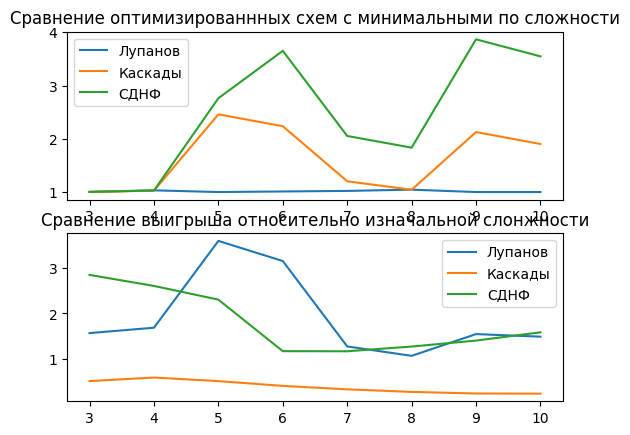

In [245]:
k =11
#oplup/min(oplup, opcas)
#opcas/min(oplup, opcas)
#
plt.subplot(211)
plt.plot(list(range(3, k)),l1_s, label="Лупанов")
plt.plot(list(range(3, k)),l2_s, label="Каскады")
plt.plot(list(range(3, k)),l3_s, label="СДНФ")

plt.xticks(list(range(3, k)))
plt.legend()
plt.title("Сравнение оптимизированнных схем с минимальными по сложности")
plt.subplot(212)
plt.plot(list(range(3, k)),l4_s, label="Лупанов")
plt.plot(list(range(3, k)),l5_s, label="Каскады")
plt.plot(list(range(3, k)),l6_s, label="СДНФ")

plt.xticks(list(range(3, k)))
plt.legend()
plt.title("Сравнение выигрыша относительно изначальной слонжности")

plt.show()



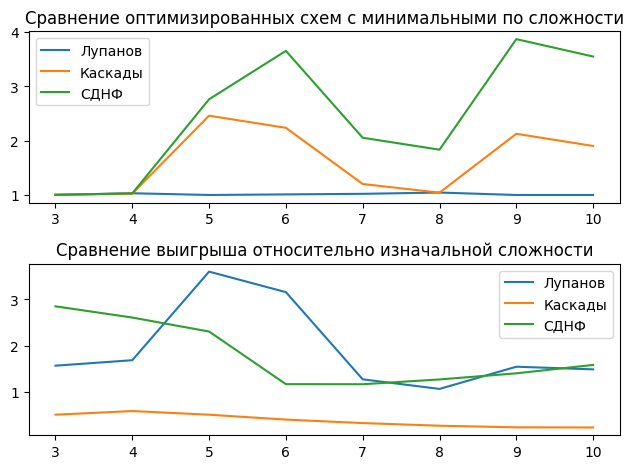

In [247]:
import matplotlib.pyplot as plt

k = 11
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(list(range(3, k)), l1_s, label="Лупанов")
axes[0].plot(list(range(3, k)), l2_s, label="Каскады")
axes[0].plot(list(range(3, k)), l3_s, label="СДНФ")
axes[0].legend()
axes[0].set_title("Сравнение оптимизированных схем с минимальными по сложности")

axes[1].plot(list(range(3, k)), l4_s, label="Лупанов")
axes[1].plot(list(range(3, k)), l5_s, label="Каскады")
axes[1].plot(list(range(3, k)), l6_s, label="СДНФ")
axes[1].legend()
axes[1].set_title("Сравнение выигрыша относительно изначальной сложности")

plt.tight_layout()
plt.show()


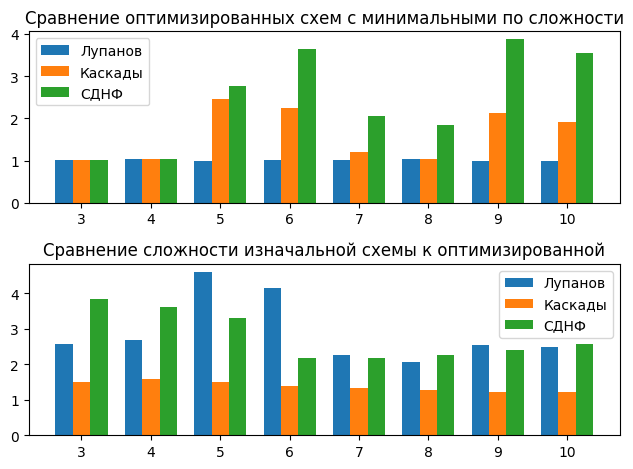

In [258]:
import matplotlib.pyplot as plt

k = 11
fig, axes = plt.subplots(nrows=2, ncols=1)

# For bar charts, determine the width of each bar and the x positions
width = 0.25
x = list(range(3, k))
x1 = [xi - width for xi in x]
x2 = x
x3 = [xi + width for xi in x]

# First subplot
axes[0].bar(x1, l1_s, width=width, label="Лупанов")
axes[0].bar(x2, l2_s, width=width, label="Каскады")
axes[0].bar(x3, l3_s, width=width, label="СДНФ")
axes[0].legend()
axes[0].set_title("Сравнение оптимизированных схем с минимальными по сложности")

# Second subplot
axes[1].bar(x1, l4_t, width=width, label="Лупанов")
axes[1].bar(x2, l5_t, width=width, label="Каскады")
axes[1].bar(x3, l6_t, width=width, label="СДНФ")
axes[1].legend()
axes[1].set_title("Сравнение сложности изначальной схемы к оптимизированной")

plt.tight_layout()
plt.show()

In [256]:
l4_t = [0]*8
l5_t = [0]*8
l6_t = [0]*8
for i in range (8):
    l4_t[i] = l4_s[i] + 1
    l5_t[i] = l5_s[i] + 1
    l6_t[i] = l6_s[i] + 1

In [257]:
l4_t

[2.5657066052227346,
 2.6839696675679834,
 4.599211281340187,
 4.155581595154589,
 2.271192143199312,
 2.0633226960672792,
 2.5434033286072184,
 2.486231863253991]